# Experimento

El propósito de este experimento es encontrar una situación en la que de tres experimentos que tienen un rendimiento similar, al obtener diferencias con el "ganador" o "más alto desempeño" las diferencias con el más cercano competidor son significativas pero con el tercer competidor no lo son.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from CompStats import performance, plot_performance
from CompStats import difference, plot_difference
from sklearn.metrics import f1_score

In [2]:
# La siguiente función da como salida una copia del vector de entrada, alterando aleatoriamente una proporcion "prop" de los valores de entrada.
# la función está pensada en valor 0 y 1.
def alterar_vector(vector, prop):
    # Número total de elementos a modificar
    n_alterar = int(len(vector) * prop)
    
    # Índices aleatorios de los elementos a modificar
    indices_a_modificar = np.random.choice(len(vector), size=n_alterar, replace=False)
    
    # Alterar los valores en los índices seleccionados
    vector_modificado = vector.copy()
    vector_modificado[indices_a_modificar] = 1 - vector_modificado[indices_a_modificar]
    
    return vector_modificado


## Parámetros del experimento
Los parámetros utilizados son:

$n$ es el número de valores del dataset.


In [3]:

# Parámetros
n = 500
prob_1_col1 = 0.6
prob_1_col2_given_col1_1 = 0.8
prob_1_col2_given_col1_0 = 0.3


In [4]:
np.random.seed(0)
# Generar la primera columna con 60% de 1's y 40% de 0's
col1 = np.random.choice([1, 0], size=n, p=[prob_1_col1, 1-prob_1_col1])

# Generar la segunda columna basada en la primera
col2 = np.array([
    np.random.choice([1, 0], p=[prob_1_col2_given_col1_1, 1-prob_1_col2_given_col1_1]) if val == 1 
    else np.random.choice([1, 0], p=[prob_1_col2_given_col1_0, 1-prob_1_col2_given_col1_0]) 
    for val in col1
])
col3 = np.array([
    np.random.choice([1, 0], p=[prob_1_col2_given_col1_1, 1-prob_1_col2_given_col1_1]) if val == 1 
    else np.random.choice([1, 0], p=[prob_1_col2_given_col1_0, 1-prob_1_col2_given_col1_0]) 
    for val in col1
])

col4 = alterar_vector(col3,0.08)
col5 = alterar_vector(col2,0.36)

# Crear el DataFrame
dforiginal = pd.DataFrame({'Sexo': col1, 'y': col2, 'pred1': col3,'pred2': col4,'pred3': col5})

# Mostrar el DataFrame
print(dforiginal.head())




   Sexo  y  pred1  pred2  pred3
0     1  1      1      1      1
1     0  0      1      1      1
2     0  0      0      1      0
3     1  1      1      1      0
4     1  1      1      1      1


In [5]:
confusion_matrix(col3,col4)

array([[188,  19],
       [ 21, 272]])

In [20]:
print(classification_report(dforiginal.y,dforiginal.pred1))
print(classification_report(dforiginal.y,dforiginal.pred2))
print(classification_report(dforiginal.y,dforiginal.pred3))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       204
           1       0.71      0.70      0.70       296

    accuracy                           0.65       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.65      0.65      0.65       500

              precision    recall  f1-score   support

           0       0.53      0.54      0.53       204
           1       0.68      0.67      0.67       296

    accuracy                           0.61       500
   macro avg       0.60      0.60      0.60       500
weighted avg       0.62      0.61      0.61       500

              precision    recall  f1-score   support

           0       0.55      0.67      0.60       204
           1       0.73      0.62      0.67       296

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.66      0.64      0.64       500



In [8]:
df = dforiginal.iloc[:,1:]

In [9]:
score = lambda y, hy: f1_score(y, hy)

In [10]:
perf = performance(df, score=score,num_samples=1000)

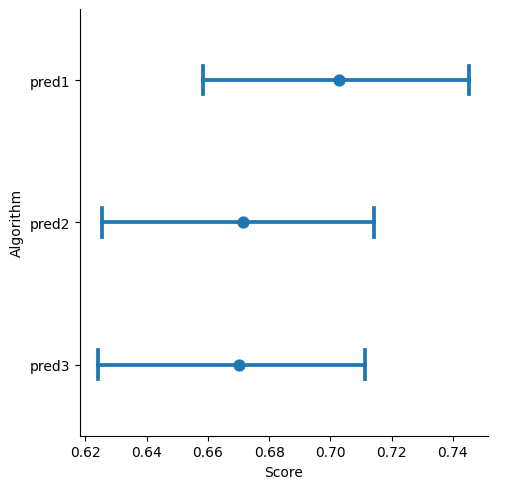

In [11]:
face_grid = plot_performance(perf)

In [12]:
diff = difference(perf)
diff.info

{'best': 'pred1'}

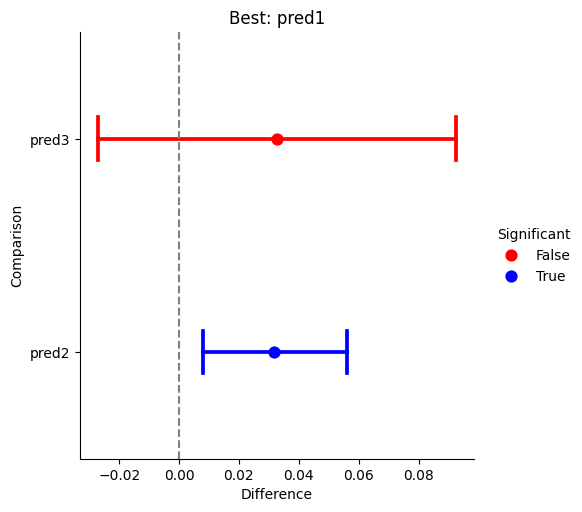

In [13]:
face_grid_diff = plot_difference(diff)

In [21]:
pd.crosstab(dforiginal.Sexo,dforiginal.y)

y,0,1
Sexo,,
0,142,54
1,62,242


In [15]:
pd.crosstab(dforiginal.Sexo,dforiginal.y,normalize='index')

y,0,1
Sexo,,
0,0.724490,0.275510
1,0.203947,0.796053


In [16]:
pd.crosstab(dforiginal.Sexo,dforiginal.pred1,normalize='index')

pred1,0,1
Sexo,,
0,0.724490,0.275510
1,0.213816,0.786184


In [17]:
pd.crosstab(dforiginal.Sexo,dforiginal.pred2,normalize='index')

pred2,0,1
Sexo,,
0,0.683673,0.316327
1,0.246711,0.753289


In [18]:
pd.crosstab(dforiginal.Sexo,dforiginal.pred3,normalize='index')

pred3,0,1
Sexo,,
0,0.551020,0.448980
1,0.460526,0.539474
